In [1]:
import xarray as xr
import rioxarray as rio
import geopandas as gpd
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from shapely.geometry import Polygon, Point, MultiPolygon
import cartopy.crs as ccrs 

In [2]:
# file_name = '../data/teste/oco2_LtCO2_190802_B10206Ar_200729204909s.nc4'

file_name = '/mnt/g/My Drive/MAPBIOMAS-EXPORT/Assorted Files to Test/GoSat/apr2009.nc'
# /mnt/g/My Drive/MAPBIOMAS-EXPORT/Assorted Files to Test/GoSat/20090418-C3S-L2_GHG-GHG_PRODUCTS-TANSO-GOSAT-OCFP-DAILY-v7.3.nc
nc_file = xr.open_dataset(file_name)
nc_file

<xarray.Dataset>
Dimensions:                           (n: 723, m: 20)
Dimensions without coordinates: n, m
Data variables: (12/26)
    xco2_averaging_kernel             (n, m) float32 ...
    surface_air_pressure_apriori_std  (n) float32 ...
    pressure_weight                   (n, m) float32 ...
    xco2_uncertainty                  (n) float32 ...
    pressure_levels                   (n, m) float32 ...
    solar_zenith_angle                (n) float32 ...
    ...                                ...
    longitude                         (n) float32 ...
    sensor_zenith_angle               (n) float32 ...
    cirrus                            (n) float32 ...
    aod_type1                         (n) float32 ...
    co2_profile_apriori               (n, m) float32 ...
    aod_type2                         (n) float32 ...
Attributes: (12/40)
    title:                     ESA CCI GOSAT OCFP CO2
    institution:               University of Leicester
    source:                    GOSAT L1B version v210
    references:                http://www.esa-ghg-cci.org/\n http://dx.doi.or...
    tracking_id:               a7d757da-8ed3-11ea-8855-5cb9019d5f1c
    Conventions:               CF-1.6
    ...                        ...
    time_coverage_resolution:  TO CHECK P1D
    standard_name_vocabulary:  NetCDF Climate and Forecast (CF) Metadata Conv...
    license:                   ESA CCI Data Policy: free and open access
    platform:                  GOSAT
    sensor:                    TANSO-FTS
    spatial_resolution:        10.5 km diameter footprint at nadir (typically)

In [77]:
xco2 = nc_file[[
    'time',
    'longitude',
    'latitude',
    'xco2'
]]

# lons = xco2.variables['longitude'][:]
# lats = xco2.variables['latitude'][:]
# co2 = xco2.variables['xco2'][:]


xco2 = xco2.to_dataframe()



In [78]:
crs = {'init':'EPSG:4326'}
geometry = [Point(xy) for xy in zip(xco2['longitude'], xco2['latitude'])]
geo_df = gpd.GeoDataFrame(xco2, 
                        #   crs = crs, 
                          geometry = geometry)

Text(0.5, 1.0, 'xco2 from GoSat')

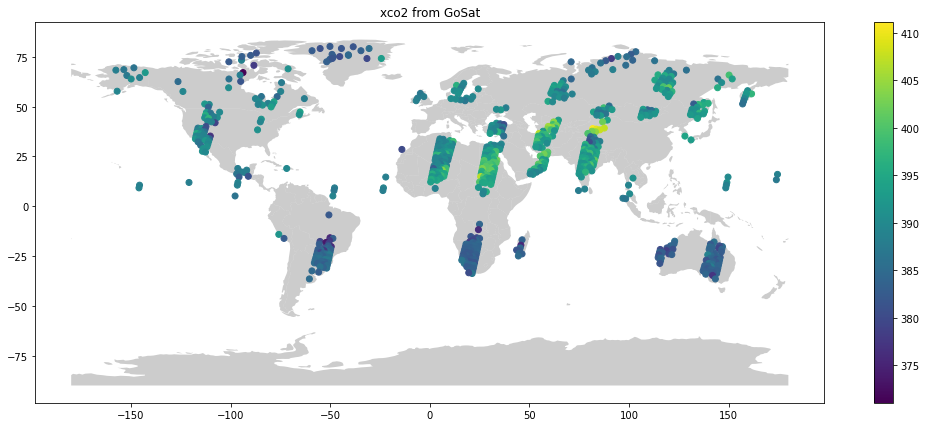

In [79]:
world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))

fig, ax = plt.subplots(figsize=(18, 7))
world.plot(ax=ax, alpha=0.4, color='grey')
geo_df.plot(column='xco2', ax=ax, legend=True)

plt.title('xco2 from GoSat')


In [74]:
geo_df #= geo_df.columns['longitude','latitude','xco2']
geo_df = geo_df.iloc[:,3:5]

In [75]:
geo_df.to_file('mayra.shp')
